In [ ]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune
import jax.numpy as jnp
""", fit_obs = list(range(10))"""
summer_fits = Polyfit('summer_data/fits.npz', input_h5='summer_data/inputdata.h5', order=6, covariance = True, cpu = True, reg_mode = "ridge_w", reg_param = 0.01, num_bins=1000)

Filtered 782 of 134343 total bins for invalid input
Choosing to fit observables with ['d00-', 'd01-', 'd02-', 'd03-', 'd04-', 'd05-']
Fitting 315 of 315: /ATLAS_2019_I1736531/d05-x01-y01[AUX_pdfup]#6               
Fits written to summer_data/fits.npz


loading  summer_data/fits.npz
Calculated inital guess:  [0.12816319]
Tuned Parameters:  [0.1282165] , Objective =  272.30547661564486 , chi2/ndf =  8.008984606342496
Covariance of Tuned Parameters:  [[8.64252345e-08]]
loading  summer_data/fits.npz
Calculated inital guess:  [0.12790236]
Tuned Parameters:  [0.12760073] , Objective =  20.579566975773048 , chi2/ndf =  0.6052813816403838
Covariance of Tuned Parameters:  [[4.90254224e-08]]
target deviation 37.3614, with confidence level 0.6827, edof 34.0000
target deviation 37.3614, with confidence level 0.6827, edof 34.0000


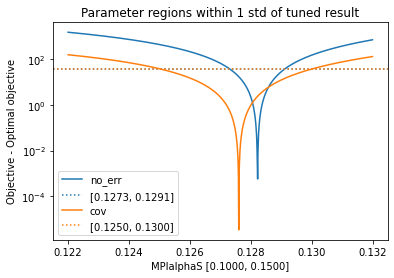

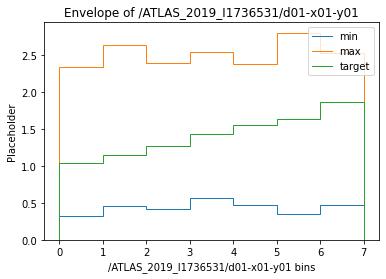

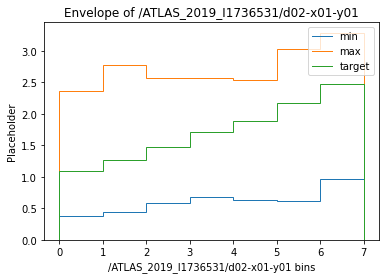

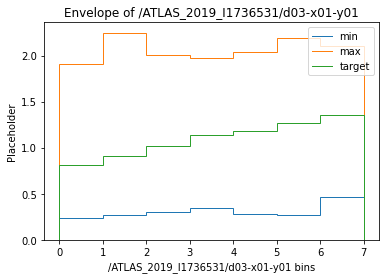

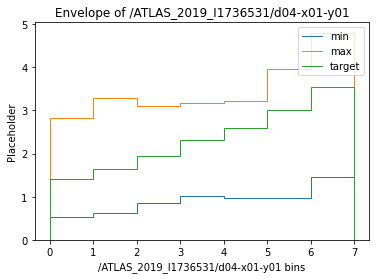

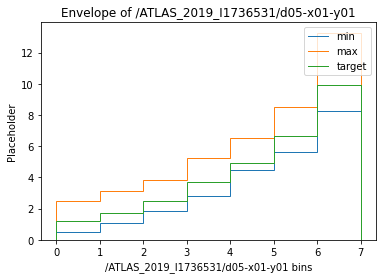

In [2]:
#target_bins = list(range(40))
#summer_tune_more = Paramtune('summer_data/fits.npz', 'summer_data/HEPData-ins1736531-v1-csv.h5', covariance = False, target_bins = target_bins)
summer_tune_more_cov = Paramtune('summer_data/fits.npz', 'summer_data/HEPData-ins1736531-v1-csv.h5', covariance = True)
#graph_range = [0.122, 0.132]
#summer_tune_more.graph_objective(graph_range = graph_range)
#summer_tune_more.graph_envelope_target()




In [ ]:
summer_tune_more_cov.graph_tune('/ATLAS_2019_I1736531/d01-x01-y01')
summer_fits.graph_bin('/ATLAS_2019_I1736531/d01-x01-y01#3')
summer_fits.graph_bin('/ATLAS_2019_I1736531/d01-x01-y01#4')
summer_fits.graph_bin('/ATLAS_2019_I1736531/d53-x01-y01[AUX_mur2_muf_1]#20')
summer_fits.graph_bin('/ATLAS_2019_I1736531/d53-x01-y01[AUX_mur2_muf_1]#0')

Tuning with 100 samples of size 7 out of 10
Filtered 782 of 134343 total bins for invalid input
Choosing to fit observables with ['d00-', 'd01-', 'd02-', 'd03-', 'd04-', 'd05-']
Fitting 315 of 315: /ATLAS_2019_I1736531/d05-x01-y01[AUX_pdfup]#6               
Fits written to None
Sample 0 Tuned: [0.12945648] | chi2/ndf: 12.882175521500548
Filtered 782 of 134343 total bins for invalid input
Choosing to fit observables with ['d00-', 'd01-', 'd02-', 'd03-', 'd04-', 'd05-']
Fitting 315 of 315: /ATLAS_2019_I1736531/d05-x01-y01[AUX_pdfup]#6               
Fits written to None
Sample 1 Tuned: [0.12875592] | chi2/ndf: 9.108880068384508
Filtered 782 of 134343 total bins for invalid input
Choosing to fit observables with ['d00-', 'd01-', 'd02-', 'd03-', 'd04-', 'd05-']
Fitting 315 of 315: /ATLAS_2019_I1736531/d05-x01-y01[AUX_pdfup]#6               
Fits written to None
Sample 2 Tuned: [0.12855347] | chi2/ndf: 9.009187041045264
Filtered 782 of 134343 total bins for invalid input
Choosing to fit ob

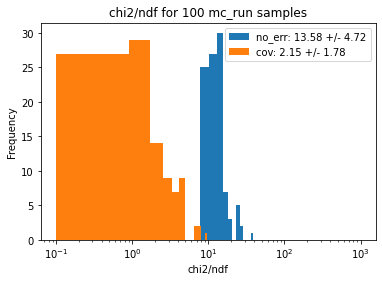

In [ ]:
import matplotlib.pyplot as plt
cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
summer_tune_more.graph_chi2_sample('summer_data/inputdata.h5', num_samples=100, sample_prop = 0.71,
 color = cycle_colors[0], save_file = 'summer_data/chi2results_no_err.json', fit_obs = list(range(6)))
summer_tune_more_cov.graph_chi2_sample('summer_data/inputdata.h5', num_samples=100, sample_prop = 0.71,
 color = cycle_colors[1], save_file = 'summer_data/chi2results_w_cov.json', new_figure = False,
 save_figure = "summer_data/chi2_graph.pdf", fit_obs = list(range(6)))


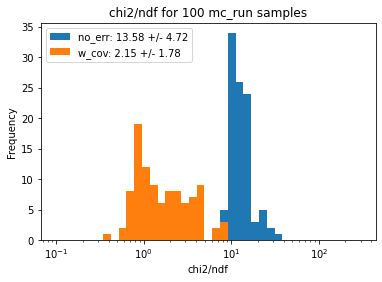

In [4]:
import json
plt.figure()
plt.title("chi2/ndf for 100 mc_run samples")
plt.ylabel("Frequency")
plt.xlabel("chi2/ndf")
plt.xscale('log')
cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

graph_range = [0.1,300]
logbins = jnp.geomspace(graph_range[0], graph_range[1], 40)

for objective_name, color in zip(["no_err", "w_cov"],cycle_colors[0:2]):
    with open("summer_data/chi2results_" + objective_name + ".json", 'r') as f:
        chi2ndf = json.loads(f.read())["chi2ndf"]
    label = objective_name + ": {:.2f} +/- {:.2f}".format(jnp.mean(jnp.array(chi2ndf)), jnp.std(jnp.array(chi2ndf)))
    plt.hist(chi2ndf, bins = logbins, label = label, range = graph_range, facecolor = color)
    plt.legend()
plt.savefig("summer_data/5obs_chi2_graph.pdf")

In [13]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune

summer_fits = Polyfit('summer_data_4alphaS/fits.npz', input_h5='summer_data_4alphaS/4alphas_50runs_inputdata_reformat.h5',
 order=3, covariance = True, fit_obs = list(range(1,16)), cpu = True, pdf_uncertainty = True, reg_mode = 'ridge_w', reg_param = 0.5)
#take first two bins of first 15 observables (which have 8 bins each)
target_bins = [i for i in range(8*15) if i%8 == 0 or i%8 == 1]
summer_tune_no_err = Paramtune('summer_data_4alphaS/fits.npz', 'summer_data_4alphaS/HEPData-ins1736531-v1-csv.h5',
 covariance = False, target_bins = target_bins, cpu = True)
summer_tune_cov = Paramtune('summer_data_4alphaS/fits.npz', 'summer_data_4alphaS/HEPData-ins1736531-v1-csv.h5',
 covariance = True, target_bins = target_bins, cpu = True)

Filtered 105 of 14927 total bins for invalid input
Choosing to fit observables with ['d01-', 'd02-', 'd03-', 'd04-', 'd05-', 'd06-', 'd07-', 'd08-', 'd09-', 'd10-', 'd11-', 'd12-', 'd13-', 'd14-', 'd15-']
Attempting to fit 105 of 105: /ATLAS_2019_I1736531/d15-x01-y01#6                          
 0  bins skipped for zeros.

Fits written to summer_data_4alphaS/fits.npz
loading  summer_data_4alphaS/fits.npz
Calculated inital guess:  [0.11071701 0.14261397 0.13921538 0.15389594]
Tuned Parameters:  [0.10504858 0.14382925 0.13664308 0.13880982] , Objective =  7.033294236640742 , chi2/ndf =  0.2705113167938747
Covariance of Tuned Parameters:  [[ 4.00508753e-05 -6.24336599e-06  2.71576451e-06 -1.01353814e-05]
 [-6.24336599e-06  3.04567605e-06 -3.58854626e-06 -1.09684471e-07]
 [ 2.71576451e-06 -3.58854626e-06  2.72499597e-05  1.58715354e-06]
 [-1.01353814e-05 -1.09684471e-07  1.58715354e-06  4.14303950e-05]]
loading  summer_data_4alphaS/fits.npz
Calculated inital guess:  [0.10879578 0.1415897  

In [3]:
summer_fits.param_names

array(['TSalphaS', 'MPIalphaS', 'SSalphaS', 'SPalphaS'], dtype='<U9')

target deviation 28.8638, with confidence level 0.6827, edof 26.0000


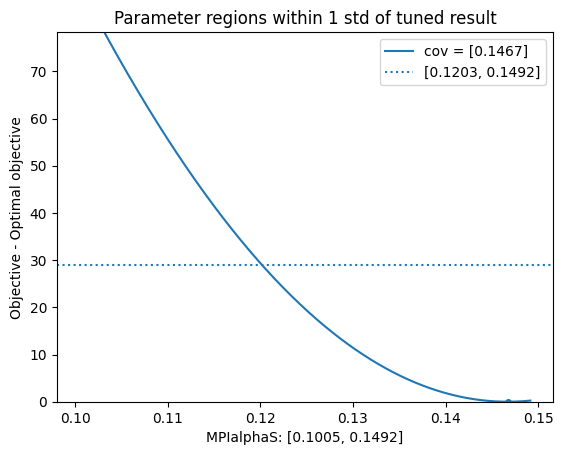

In [15]:
summer_tune_cov.graph_objective(graph_p = 'MPIalphaS')